<a href="https://colab.research.google.com/github/swleegit/Hongong_ML/blob/main/03_01K_%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-최근접 이웃 회귀
- 지도학습 알고리즘은 크게 분류와 회귀로 나뉜다.
  - classification(분류) : 샘플을 몇개의 클래스 중 하나로 분류하는 것
  - regression(회귀) : 임의의 숫자로 예측하는 것

- 샘플에 가까운 k개의 데이터를 선택한 다음 각 수치의 평균으로 타깃값을 정한다.

- KNeighborsRegressor의 매개변수와 KNeighborsClassifier매개변수는 거의 동일하다.

- n_neighbors = ~ 로 조정 가능하다.




[데이터](http://bit.ly/perch_data)


In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

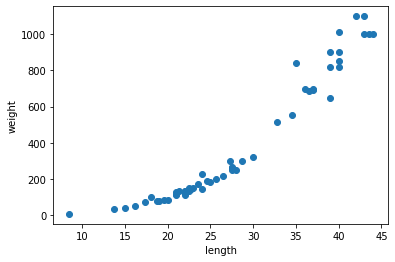

In [ ]:
#특성1개니까 x에는 특성 y에는 타깃값을 배치한다.
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
#훈련을 위해 훈련세트와 테스트 세트로 나눈다. 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
train_test_split(perch_length, perch_weight, random_state = 42)

#perch_length의 shape은 1행1열로 2차원 배열이 아님. 따라서 train_input, test_input도 1차원 배열 
#train_test_split은 원본 데이터의 차원을 따른다.
#문제는 fit, score, predict할때 x값(=input)데이터는 2차원 배열이어야한다.
#따라서 강제로 2차원 배열로 만들어야한다.

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
array1 = np.arange(42).reshape(2,21)
array2 = np.reshape(array1, (21,2))

# 결정계수
- k최근접이웃 분류 알고리즘 : KNeighborsClassifier
- k최근접이웃 회귀 알고리즘 : KNeighborsRegressor

점수의미  
- 분류의 경우 테스트 샘플을 정확하게 분류한 개수의 비율(=정확도)

- 예측값이 임의의 수치이기 때문에 정확한 값을 맞춘다는 것은 불가능하다. 다른 방식으로 점수를 산출한다.  
회귀의 경우 결정계수(𝖱^2)(coefficient of determination)  


<img src = "https://drive.google.com/uc?id=1_8wRBOHcr-cY0RYaoaSyQ_b4xf6IpW_P" object-fit>  

- 타깃과 예측한 값의 차이의 제곱의 합을 타깃과 타깃의 평균의 제곱의 합으로 나눈것으로 1에서 뺀다.

- 0에 가까울수록 예측값이 타깃값들의 평균 수준으로 예측한는 것이다.

- 예측이 타깃에 가까울수록 1에 가까워진다.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)
knr.score(test_input, test_target)



0.992809406101064

- 결정계수의 단점은 수치에 대한 직관적 파악이 힘듬.
- sklearn.metrics 패키지 아래 mean_absolute_error은 타깃과 예측의 절댓값 오차를 평균하여 반환한다.
- 이와 비슷한 함수로는 mean_squared_error()이 있다.




In [ ]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

#KNeighborsClassifier에서는 predict와 target을 출력해서 전체 중 맞은 개수의 비율로 직관적 파악 가능함.
#KNeighborsRegressor에서는 결정계수로 직관적 파악이 불가능하다. sklearn.metrics.mean_absolute_error로 
#타깃과 예측값의 절댓값 차이의 평균으로 직관적 파악이 가능하다.

19.157142857142862


# 과대적합, 과소적합
- 과대적합(overfitting) : 훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁜 모델 

- 과소적합(underfitting) : 테스트 세트의 점수가 높거나 두 점수가 모두 낮은 경우


- 훈련세트와 테스트세트의 크기가 매우 작으면 과소적합이 일어날 가능성이 크다. 

- 모델의 복잡성을 증가시킨다 = 훈련세트에 더 잘맞게 만들면 된다.
=K-최근접이웃에서는 이웃의 개수를 줄이는 것, 이웃의 개수를 줄이면 국지적인 패턴에 민감해진다.

In [ ]:
#이웃수  = 5
print("test 점수 : {0:.2f}".format(knr.score(test_input,test_target)))
print("train점수 : {0:.2f}".format(knr.score(train_input, train_target)))

- 이웃 = 5 일때, test> train이므로 과소적합. 모델의 복잡성을 높여야한다. 이웃수를 3으로 줄이자.

In [ ]:
#이웃수 = 3
knr.n_neighbors = 3
print("test 점수 : {0:.2f}".format(knr.score(test_input,test_target)))
print("train점수 : {0:.2f}".format(knr.score(train_input, train_target)))

test 점수 : 0.97
train점수 : 0.98


# 128페이지 문제풀이

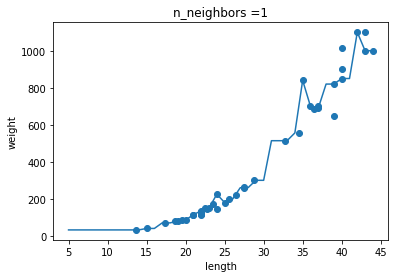

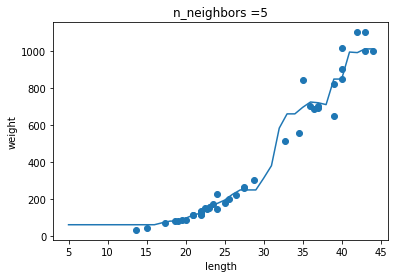

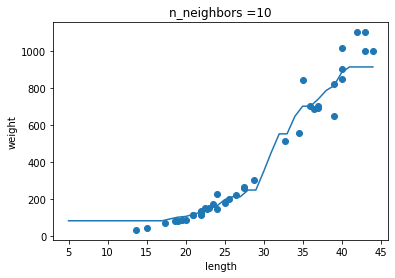

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
X = np.arange(5,45).reshape(-1,1) #input : 1차원 배열을 2차원 배열로 전환 

for n in [1,5,10]:
  knr.n_neighbors = n 
  knr.fit(train_input, train_target)
  prediction = knr.predict(X)

  #두개의 그래프를 동시에 그림 
  plt.scatter(train_input, train_target)
  plt.plot(X, prediction)
  plt.title("n_neighbors ={0}".format(n))
  plt.xlabel("length")
  plt.ylabel("weight")
  plt.show()


#n이 증가함에 따라 모델은 더 일반화됨을 알 수 있다.